In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json  
import cv2
import numpy as np

In [22]:
def show_flow(emo):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    for idx in range(len(emotion[emo])):
        target_list = [i[0].replace('-',' - ') + " -> " + i[1].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx])        
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)

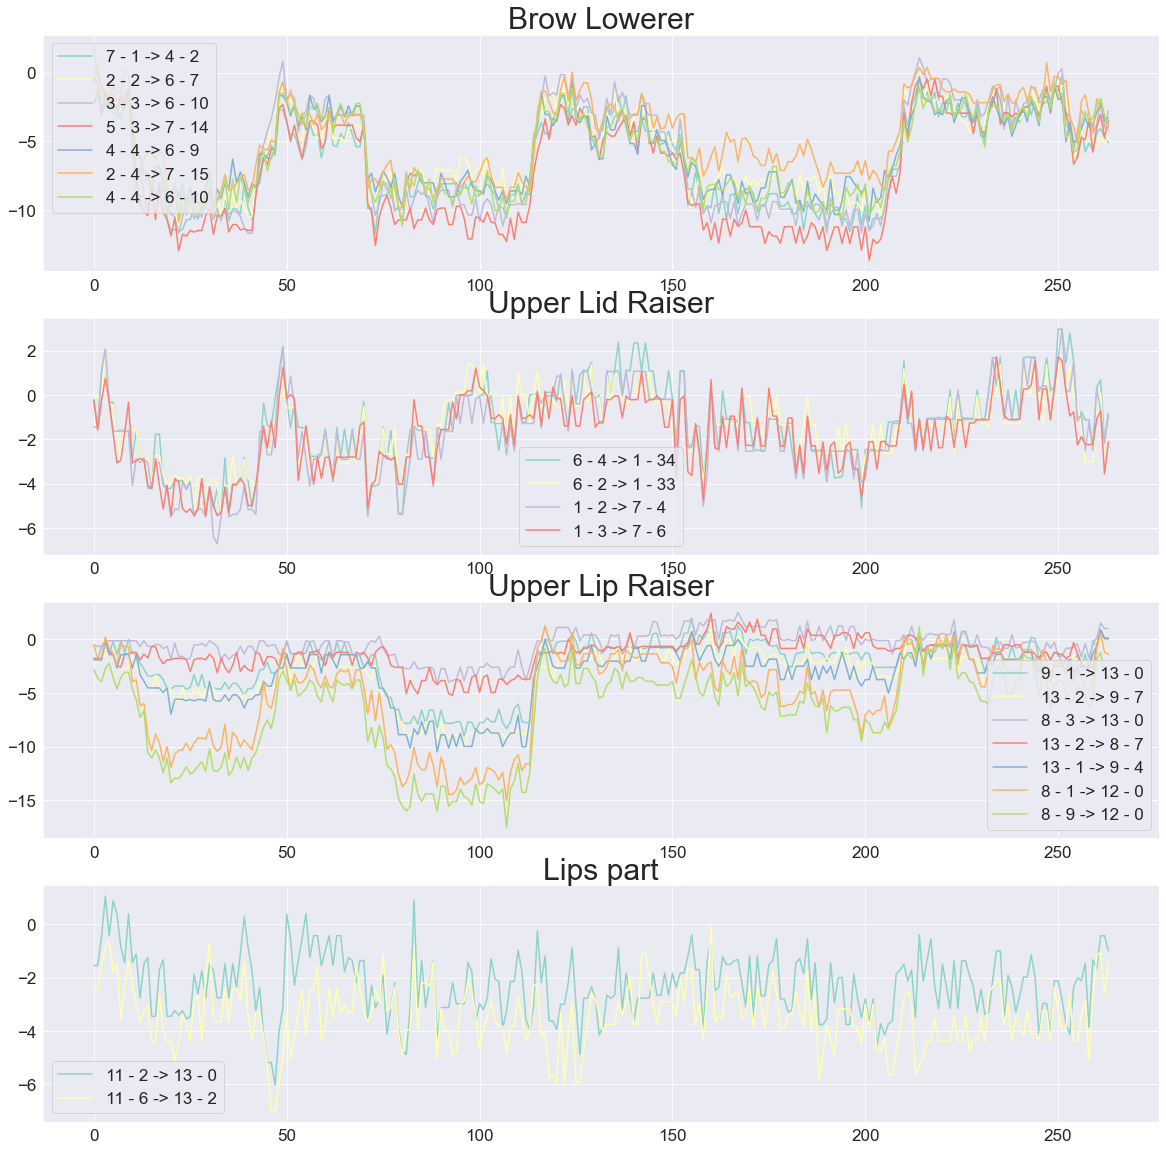

In [39]:
df = pd.read_csv('../data/image_analysis/엄마화내기3회.csv')
with open('../data/image_analysis/emotion_rule.json', 'r') as f:
    emotion = json.load(f)
show_flow('Anger')